In [1]:
# import libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
# importing warnings & others related to display

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

from IPython.core.display import display, HTML
display(HTML('<style>.container {width:90% !important; }</style>'))

In [8]:
df = pd.read_csv('public_up_to_150k_12_230331.csv')
df.head()

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,ServicingLenderLocationID,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,ProjectCity,ProjectCountyName,ProjectState,ProjectZip,CD,JobsReported,NAICSCode,Race,Ethnicity,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate
0,2638327408,05/06/2020,304,PPP,GTS AMUSEMENT CO LLC,808 Airline Boulevard,Portsmouth,VA,23707,09/25/2021,Paid in Full,24,100,75000.0,75000.0,0.0,NaN,456756,Cross River Bank,885 Teaneck Rd,TEANECK,NJ,07666-4546,U,Y,Y,Unanswered,Portsmouth,PORTSMOUTH CITY,VA,23707-0001,VA-03,51,812990.0,Unanswered,Unknown/NotStated,NaN,75000.0,NaN,NaN,NaN,NaN,NaN,Sole Proprietorship,456756,Cross River Bank,TEANECK,NJ,Unanswered,Unanswered,NaN,75949.32,08/12/2021
1,2838739007,05/18/2021,353,PPS,RADIO JAVAN INC,2220 Fairfax Dr Apt 410,Arlington,VA,22201-6630,05/12/2022,Paid in Full,60,100,75000.0,75000.0,0.0,NaN,12096,"Wells Fargo Bank, National Association",101 N Philips Ave,SIOUX FALLS,SD,57104-6738,U,N,N,Existing or more than 2 years old,Arlington,ARLINGTON,VA,22201-6630,VA-08,5,511210.0,Unanswered,Unknown/NotStated,1.0,74999.0,NaN,NaN,NaN,NaN,NaN,Corporation,12096,"Wells Fargo Bank, National Association",SIOUX FALLS,SD,Unanswered,Unanswered,NaN,63674.75,02/25/2022
2,2878667110,04/11/2020,304,PPP,"EXTREME AUDIO, INC",7451 Sujen Ct,MECHANICSVILLE,VA,23111-3676,05/13/2021,Paid in Full,24,100,75000.0,75000.0,0.0,NaN,74135,Citizens and Farmers Bank,415 14th St,WEST POINT,VA,23181,R,N,N,Existing or more than 2 years old,MECHANICSVILLE,HANOVER,VA,23111-3676,VA-01,8,441310.0,Unanswered,Unknown/NotStated,NaN,75000.0,NaN,NaN,NaN,NaN,NaN,Corporation,74135,Citizens and Farmers Bank,WEST POINT,VA,Unanswered,Unanswered,NaN,75741.78,04/15/2021
3,2946267100,04/11/2020,353,PPP,"AJ'S HEATING & AIR CONDITIONING, LLC",6564 LOISDALE CT STE 600,SPRINGFIELD,VA,22150-1801,05/12/2021,Paid in Full,24,100,75000.0,75000.0,0.0,NaN,122517,Atlantic Union Bank,"1051 E Cary St, Ste 103",RICHMOND,VA,23219-4029,U,N,N,Existing or more than 2 years old,SPRINGFIELD,FAIRFAX,VA,22150-1801,VA-11,7,238220.0,Unanswered,Unknown/NotStated,NaN,75000.0,NaN,NaN,NaN,NaN,NaN,Limited Liability Company(LLC),122517,Atlantic Union Bank,RICHMOND,VA,Unanswered,Unanswered,NaN,75762.50,04/29/2021
4,3015578505,02/22/2021,353,PPP,THE CHILDREN'S PLACE,860 Dranesville Rd,Herndon,VA,20170-3019,12/18/2021,Paid in Full,60,100,75000.0,75000.0,0.0,NaN,225134,Truist Bank,214 N Tryon St,CHARLOTTE,NC,28202-1078,U,N,N,Existing or more than 2 years old,Herndon,FAIRFAX,VA,20170-3019,VA-11,12,624410.0,Unanswered,Unknown/NotStated,1.0,74997.0,NaN,NaN,NaN,NaN,NaN,Subchapter S Corporation,225134,Truist Bank,CHARLOTTE,NC,Unanswered,Unanswered,NaN,75525.00,11/09/2021


In [7]:
df.shape

(595632, 53)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595632 entries, 0 to 595631
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   LoanNumber                   595632 non-null  int64  
 1   DateApproved                 595632 non-null  object 
 2   SBAOfficeCode                595632 non-null  int64  
 3   ProcessingMethod             595632 non-null  object 
 4   BorrowerName                 595624 non-null  object 
 5   BorrowerAddress              595626 non-null  object 
 6   BorrowerCity                 595627 non-null  object 
 7   BorrowerState                595632 non-null  object 
 8   BorrowerZip                  595627 non-null  object 
 9   LoanStatusDate               576431 non-null  object 
 10  LoanStatus                   595632 non-null  object 
 11  Term                         595632 non-null  int64  
 12  SBAGuarantyPercentage        595632 non-null  int64  
 13 

In [9]:
df.isnull().sum()

LoanNumber                          0
DateApproved                        0
SBAOfficeCode                       0
ProcessingMethod                    0
BorrowerName                        8
BorrowerAddress                     6
BorrowerCity                        5
BorrowerState                       0
BorrowerZip                         5
LoanStatusDate                  19201
LoanStatus                          0
Term                                0
SBAGuarantyPercentage               0
InitialApprovalAmount               0
CurrentApprovalAmount               0
UndisbursedAmount                 174
FranchiseName                  587571
ServicingLenderLocationID           0
ServicingLenderName                 0
ServicingLenderAddress              0
ServicingLenderCity                 0
ServicingLenderState                0
ServicingLenderZip                  0
RuralUrbanIndicator                 0
HubzoneIndicator                    0
LMIIndicator                        0
BusinessAgeD

In [11]:
df = df.loc[df['BorrowerName'].notnull()]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 595624 entries, 0 to 595631
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   LoanNumber                   595624 non-null  int64  
 1   DateApproved                 595624 non-null  object 
 2   SBAOfficeCode                595624 non-null  int64  
 3   ProcessingMethod             595624 non-null  object 
 4   BorrowerName                 595624 non-null  object 
 5   BorrowerAddress              595618 non-null  object 
 6   BorrowerCity                 595619 non-null  object 
 7   BorrowerState                595624 non-null  object 
 8   BorrowerZip                  595619 non-null  object 
 9   LoanStatusDate               576424 non-null  object 
 10  LoanStatus                   595624 non-null  object 
 11  Term                         595624 non-null  int64  
 12  SBAGuarantyPercentage        595624 non-null  int64  
 13 

In [16]:
df['year_approved'] = pd.DatetimeIndex(df['DateApproved']).year
df['month_approved'] = pd.DatetimeIndex(df['DateApproved']).month

df['year_forgiven'] = pd.DatetimeIndex(df['ForgivenessDate']).year
df['month_forgiven'] = pd.DatetimeIndex(df['ForgivenessDate']).month

In [17]:
df.head()

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,ServicingLenderLocationID,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,ProjectCity,ProjectCountyName,ProjectState,ProjectZip,CD,JobsReported,NAICSCode,Race,Ethnicity,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate,year_approved,month_approved,year_forgiven,month_forgiven
0,2638327408,05/06/2020,304,PPP,GTS AMUSEMENT CO LLC,808 Airline Boulevard,Portsmouth,VA,23707,09/25/2021,Paid in Full,24,100,75000.0,75000.0,0.0,NaN,456756,Cross River Bank,885 Teaneck Rd,TEANECK,NJ,07666-4546,U,Y,Y,Unanswered,Portsmouth,PORTSMOUTH CITY,VA,23707-0001,VA-03,51,812990.0,Unanswered,Unknown/NotStated,NaN,75000.0,NaN,NaN,NaN,NaN,NaN,Sole Proprietorship,456756,Cross River Bank,TEANECK,NJ,Unanswered,Unanswered,NaN,75949.32,08/12/2021,2020,5,2021.0,8.0
1,2838739007,05/18/2021,353,PPS,RADIO JAVAN INC,2220 Fairfax Dr Apt 410,Arlington,VA,22201-6630,05/12/2022,Paid in Full,60,100,75000.0,75000.0,0.0,NaN,12096,"Wells Fargo Bank, National Association",101 N Philips Ave,SIOUX FALLS,SD,57104-6738,U,N,N,Existing or more than 2 years old,Arlington,ARLINGTON,VA,22201-6630,VA-08,5,511210.0,Unanswered,Unknown/NotStated,1.0,74999.0,NaN,NaN,NaN,NaN,NaN,Corporation,12096,"Wells Fargo Bank, National Association",SIOUX FALLS,SD,Unanswered,Unanswered,NaN,63674.75,02/25/2022,2021,5,2022.0,2.0
2,2878667110,04/11/2020,304,PPP,"EXTREME AUDIO, INC",7451 Sujen Ct,MECHANICSVILLE,VA,23111-3676,05/13/2021,Paid in Full,24,100,75000.0,75000.0,0.0,NaN,74135,Citizens and Farmers Bank,415 14th St,WEST POINT,VA,23181,R,N,N,Existing or more than 2 years old,MECHANICSVILLE,HANOVER,VA,23111-3676,VA-01,8,441310.0,Unanswered,Unknown/NotStated,NaN,75000.0,NaN,NaN,NaN,NaN,NaN,Corporation,74135,Citizens and Farmers Bank,WEST POINT,VA,Unanswered,Unanswered,NaN,75741.78,04/15/2021,2020,4,2021.0,4.0
3,2946267100,04/11/2020,353,PPP,"AJ'S HEATING & AIR CONDITIONING, LLC",6564 LOISDALE CT STE 600,SPRINGFIELD,VA,22150-1801,05/12/2021,Paid in Full,24,100,75000.0,75000.0,0.0,NaN,122517,Atlantic Union Bank,"1051 E Cary St, Ste 103",RICHMOND,VA,23219-4029,U,N,N,Existing or more than 2 years old,SPRINGFIELD,FAIRFAX,VA,22150-1801,VA-11,7,238220.0,Unanswered,Unknown/NotStated,NaN,75000.0,NaN,NaN,NaN,NaN,NaN,Limited Liability Company(LLC),122517,Atlantic Union Bank,RICHMOND,VA,Unanswered,Unanswered,NaN,75762.50,04/29/2021,2020,4,2021.0,4.0
4,3015578505,02/22/2021,353,PPP,THE CHILDREN'S PLACE,860 Dranesville Rd,Herndon,VA,20170-3019,12/18/2021,Paid in Full,60,100,75000.0,75000.0,0.0,NaN,225134,Truist Bank,214 N Tryon St,CHARLOTTE,NC,28202-1078,U,N,N,Existing or more than 2 years old,Herndon,FAIRFAX,VA,20170-3019,VA-11,12,624410.0,Unanswered,Unknown/NotStated,1.0,74997.0,NaN,NaN,NaN,NaN,NaN,Subchapter S Corporation,225134,Truist Bank,CHARLOTTE,NC,Unanswered,Unanswered,NaN,75525.00,11/09/2021,2021,2,2021.0,11.0


In [23]:
FirstRound = df.loc[df['ProcessingMethod'] == 'PPP']

In [24]:
SecondRound = df.loc[df['ProcessingMethod'] == 'PPS']

In [25]:
FirstRound.head()

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,ServicingLenderLocationID,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,ProjectCity,ProjectCountyName,ProjectState,ProjectZip,CD,JobsReported,NAICSCode,Race,Ethnicity,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate,year_approved,month_approved,year_forgiven,month_forgiven
0,2638327408,05/06/2020,304,PPP,GTS AMUSEMENT CO LLC,808 Airline Boulevard,Portsmouth,VA,23707,09/25/2021,Paid in Full,24,100,75000.0,75000.0,0.0,NaN,456756,Cross River Bank,885 Teaneck Rd,TEANECK,NJ,07666-4546,U,Y,Y,Unanswered,Portsmouth,PORTSMOUTH CITY,VA,23707-0001,VA-03,51,812990.0,Unanswered,Unknown/NotStated,NaN,75000.0,NaN,NaN,NaN,NaN,NaN,Sole Proprietorship,456756,Cross River Bank,TEANECK,NJ,Unanswered,Unanswered,NaN,75949.32,08/12/2021,2020,5,2021.0,8.0
2,2878667110,04/11/2020,304,PPP,"EXTREME AUDIO, INC",7451 Sujen Ct,MECHANICSVILLE,VA,23111-3676,05/13/2021,Paid in Full,24,100,75000.0,75000.0,0.0,NaN,74135,Citizens and Farmers Bank,415 14th St,WEST POINT,VA,23181,R,N,N,Existing or more than 2 years old,MECHANICSVILLE,HANOVER,VA,23111-3676,VA-01,8,441310.0,Unanswered,Unknown/NotStated,NaN,75000.0,NaN,NaN,NaN,NaN,NaN,Corporation,74135,Citizens and Farmers Bank,WEST POINT,VA,Unanswered,Unanswered,NaN,75741.78,04/15/2021,2020,4,2021.0,4.0
3,2946267100,04/11/2020,353,PPP,"AJ'S HEATING & AIR CONDITIONING, LLC",6564 LOISDALE CT STE 600,SPRINGFIELD,VA,22150-1801,05/12/2021,Paid in Full,24,100,75000.0,75000.0,0.0,NaN,122517,Atlantic Union Bank,"1051 E Cary St, Ste 103",RICHMOND,VA,23219-4029,U,N,N,Existing or more than 2 years old,SPRINGFIELD,FAIRFAX,VA,22150-1801,VA-11,7,238220.0,Unanswered,Unknown/NotStated,NaN,75000.0,NaN,NaN,NaN,NaN,NaN,Limited Liability Company(LLC),122517,Atlantic Union Bank,RICHMOND,VA,Unanswered,Unanswered,NaN,75762.50,04/29/2021,2020,4,2021.0,4.0
4,3015578505,02/22/2021,353,PPP,THE CHILDREN'S PLACE,860 Dranesville Rd,Herndon,VA,20170-3019,12/18/2021,Paid in Full,60,100,75000.0,75000.0,0.0,NaN,225134,Truist Bank,214 N Tryon St,CHARLOTTE,NC,28202-1078,U,N,N,Existing or more than 2 years old,Herndon,FAIRFAX,VA,20170-3019,VA-11,12,624410.0,Unanswered,Unknown/NotStated,1.0,74997.0,NaN,NaN,NaN,NaN,NaN,Subchapter S Corporation,225134,Truist Bank,CHARLOTTE,NC,Unanswered,Unanswered,NaN,75525.00,11/09/2021,2021,2,2021.0,11.0
5,3026507200,04/16/2020,353,PPP,HELPING CHILDREN WORLDWIDE,14101 PARKE LONG CT,CHANTILLY,VA,20151-1645,05/13/2021,Paid in Full,24,100,75000.0,75000.0,0.0,NaN,73259,United Bank,11185 Fairfax Blvd,FAIRFAX,VA,22030-5049,U,N,N,Existing or more than 2 years old,CHANTILLY,FAIRFAX,VA,20151-1645,VA-11,8,813219.0,Unanswered,Unknown/NotStated,NaN,75000.0,NaN,NaN,NaN,NaN,NaN,Non-Profit Organization,73259,United Bank,FAIRFAX,VA,Unanswered,Unanswered,Y,75714.58,04/08/2021,2020,4,2021.0,4.0


In [26]:
SecondRound.head()

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,ServicingLenderLocationID,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,ProjectCity,ProjectCountyName,ProjectState,ProjectZip,CD,JobsReported,NAICSCode,Race,Ethnicity,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate,year_approved,month_approved,year_forgiven,month_forgiven
1,2838739007,05/18/2021,353,PPS,RADIO JAVAN INC,2220 Fairfax Dr Apt 410,Arlington,VA,22201-6630,05/12/2022,Paid in Full,60,100,75000.0,75000.0,0.0,NaN,12096,"Wells Fargo Bank, National Association",101 N Philips Ave,SIOUX FALLS,SD,57104-6738,U,N,N,Existing or more than 2 years old,Arlington,ARLINGTON,VA,22201-6630,VA-08,5,511210.0,Unanswered,Unknown/NotStated,1.0,74999.0,NaN,NaN,NaN,NaN,NaN,Corporation,12096,"Wells Fargo Bank, National Association",SIOUX FALLS,SD,Unanswered,Unanswered,NaN,63674.75,02/25/2022,2021,5,2022.0,2.0
6,3064118307,01/21/2021,304,PPS,RCB AUTO SALES LLC,712 Grove Rd,Midlothian,VA,23114-2603,08/11/2021,Paid in Full,60,100,75000.0,75000.0,0.0,NaN,74135,Citizens and Farmers Bank,415 14th St,WEST POINT,VA,23181,U,N,N,Existing or more than 2 years old,Midlothian,CHESTERFIELD,VA,23114-2603,VA-01,6,441228.0,Unanswered,Unknown/NotStated,1.0,74997.0,NaN,NaN,NaN,NaN,NaN,Limited Liability Company(LLC),74135,Citizens and Farmers Bank,WEST POINT,VA,Unanswered,Unanswered,NaN,75373.97,07/26/2021,2021,1,2021.0,7.0
12,3695878308,01/22/2021,304,PPS,HAYES CONSTRUCTION CORPORATION,74 N Lake Dr,Fort Valley,VA,22652-1963,01/13/2022,Paid in Full,60,100,75000.0,75000.0,0.0,NaN,73510,The First Bank and Trust Company,359 W Main St,LEBANON,VA,24266,R,N,N,Existing or more than 2 years old,Fort Valley,SHENANDOAH,VA,22652-1963,VA-06,7,236118.0,Unanswered,Not Hispanic or Latino,NaN,75000.0,NaN,NaN,NaN,NaN,NaN,Corporation,73510,The First Bank and Trust Company,LEBANON,VA,Male Owned,Unanswered,NaN,75622.92,12/01/2021,2021,1,2021.0,12.0
13,3771208309,01/22/2021,304,PPS,JUSTIN N TEBBENKAMP DDS PC,1305 N Main St,Blacksburg,VA,24060-3129,10/07/2021,Paid in Full,60,100,75000.0,75000.0,0.0,NaN,73099,The National Bank of Blacksburg,100 S Main St,BLACKSBURG,VA,24060-4859,U,Y,Y,Existing or more than 2 years old,Blacksburg,MONTGOMERY,VA,24060-3129,VA-09,11,621210.0,Unanswered,Not Hispanic or Latino,1.0,74995.0,NaN,NaN,NaN,NaN,NaN,Corporation,73099,The National Bank of Blacksburg,BLACKSBURG,VA,Male Owned,Non-Veteran,NaN,75503.42,09/29/2021,2021,1,2021.0,9.0
19,4044268608,03/17/2021,304,PPS,MIRRORS ON THE WALL INC,23188 Airport St,North Dinwiddie,VA,23803-6915,01/31/2022,Paid in Full,60,100,75000.0,75000.0,0.0,NaN,73534,Touchstone Bank,4300 Crossings Blvd,PRINCE GEORGE,VA,23875-1452,R,N,N,Existing or more than 2 years old,North Dinwiddie,DINWIDDIE,VA,23803-6915,VA-04,10,812112.0,Unanswered,Unknown/NotStated,1.0,74998.0,NaN,NaN,NaN,NaN,NaN,Corporation,73534,Touchstone Bank,PRINCE GEORGE,VA,Unanswered,Unanswered,NaN,75333.33,08/31/2021,2021,3,2021.0,8.0


### Categorical Variables

#### Univariate variable

<Axes: xlabel='ProcessingMethod', ylabel='count'>

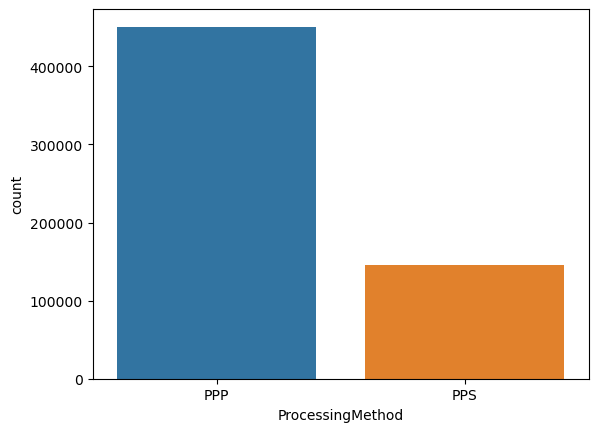

In [30]:
# no. of records in ProcessingMethod

sns.countplot(data = df, x = 'ProcessingMethod')

<Axes: xlabel='BorrowerState', ylabel='count'>

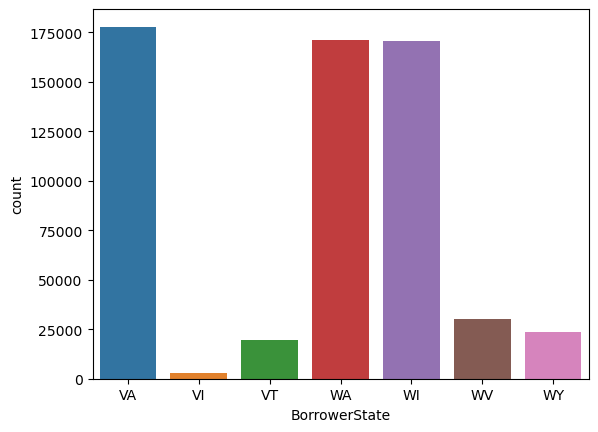

In [31]:
sns.countplot(data = df, x = 'BorrowerState')

<Axes: xlabel='Ethnicity', ylabel='count'>

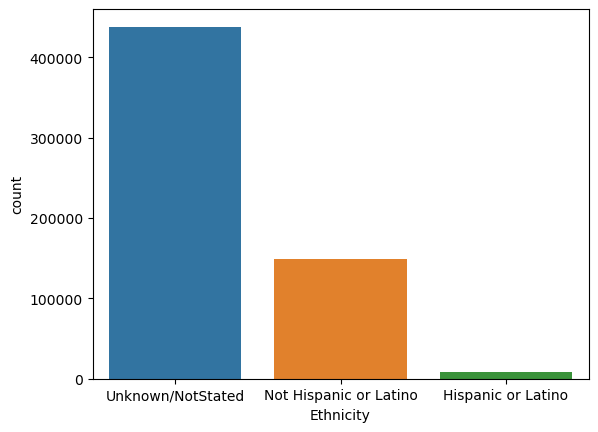

In [32]:
sns.countplot(data=df, x = 'Ethnicity')

<Axes: xlabel='LoanStatus', ylabel='count'>

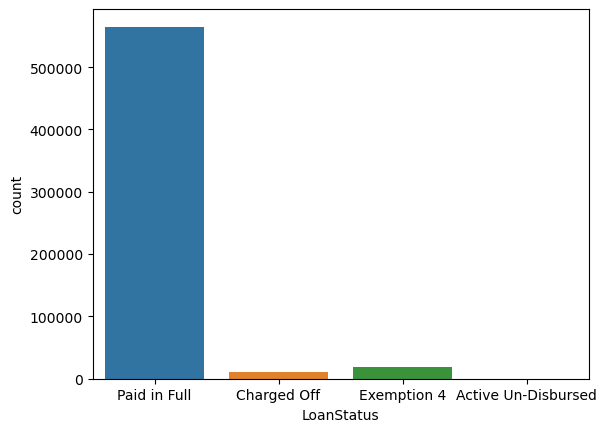

In [33]:
sns.countplot(data=df, x = 'LoanStatus')

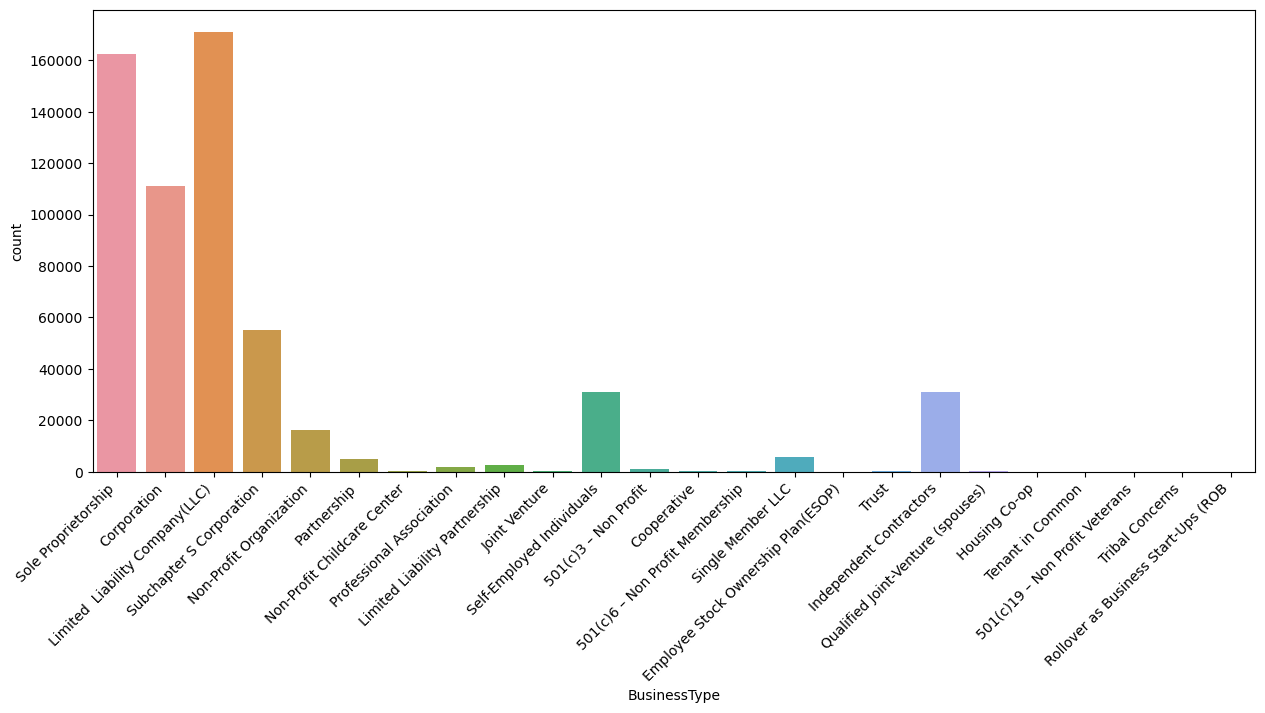

In [34]:
plt.figure(figsize=(15,6))

xx = sns.countplot(data=df, x = 'BusinessType')
xx.set_xticklabels(xx.get_xticklabels(), rotation = 45, ha='right')

plt.show()

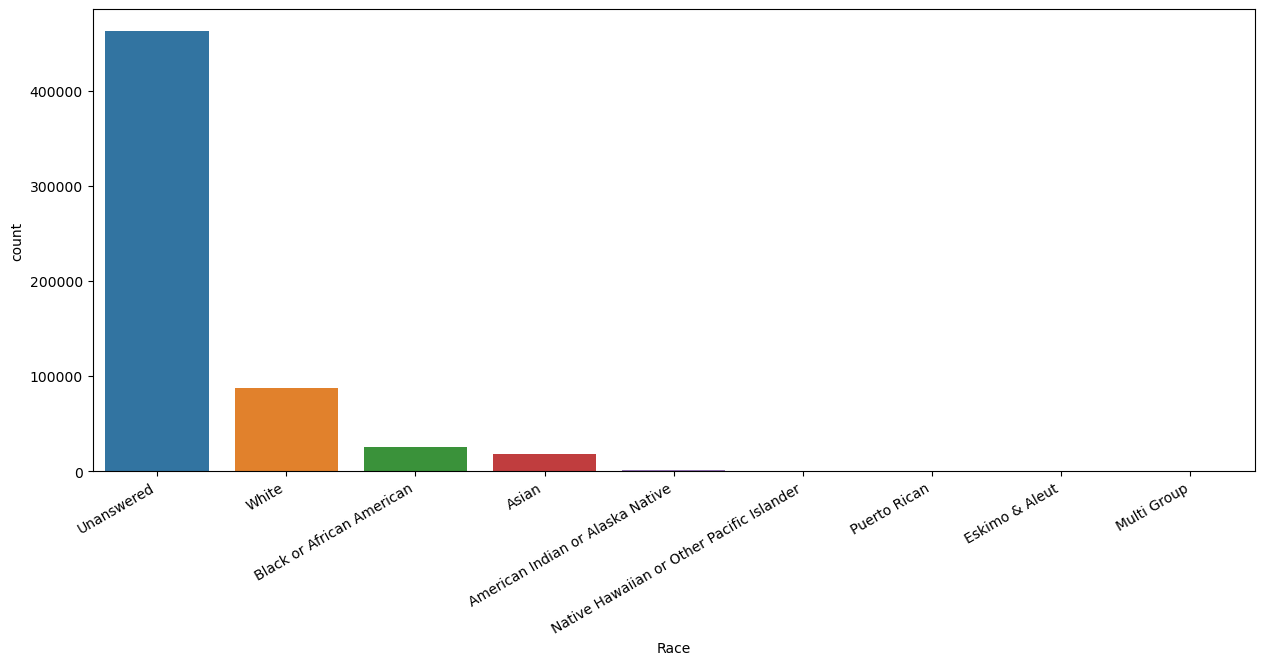

In [37]:
plt.figure(figsize = (15,6))

ax = sns.countplot(data = df, x = 'Race')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30, ha = 'right')

plt.show()

### Bivariate variables

<Axes: xlabel='Ethnicity', ylabel='count'>

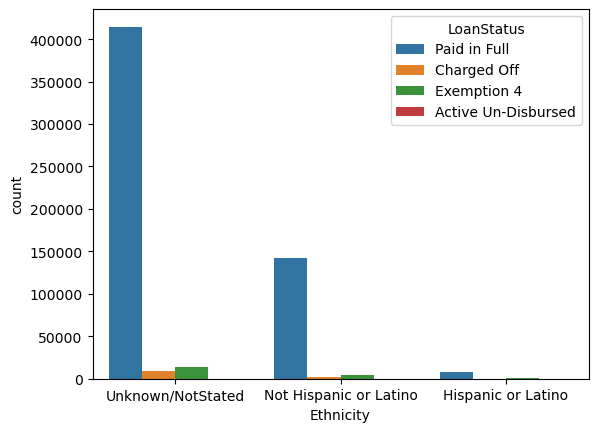

In [39]:
sns.countplot(data = df, x = 'Ethnicity', hue = 'LoanStatus')

In [40]:
pd.crosstab(df['BorrowerState'], df['Ethnicity'])

Ethnicity,Hispanic or Latino,Not Hispanic or Latino,Unknown/NotStated
BorrowerState,,,
VA,2701,38700,136412
VI,163,891,2057
VT,75,5018,14334
WA,3677,40411,127260
WI,1767,47893,120799
WV,158,9523,20271
WY,406,6111,16997


In [41]:
pd.crosstab(df['year_approved'], df['BorrowerState'])

BorrowerState,VA,VI,VT,WA,WI,WV,WY
year_approved,,,,,,,
2020,83980,1862,10782,90788,76656,15687,12160
2021,93833,1249,8645,80560,93803,14265,11354


In [42]:
pd.crosstab(df['Ethnicity'], df['LoanStatus'])

LoanStatus,Active Un-Disbursed,Charged Off,Exemption 4,Paid in Full
Ethnicity,,,,
Hispanic or Latino,0,182,348,8417
Not Hispanic or Latino,4,1840,4886,141817
Unknown/NotStated,3,9507,13966,414654


### Numerical Variables 

#### Discrete variable

In [47]:
# summary

df['CurrentApprovalAmount'].describe()

count    595624.000000
mean      26880.778917
std       28064.571281
min           1.800000
25%        8537.000000
50%       19192.000000
75%       32575.000000
max      149999.990000
Name: CurrentApprovalAmount, dtype: float64

<Axes: xlabel='CurrentApprovalAmount'>

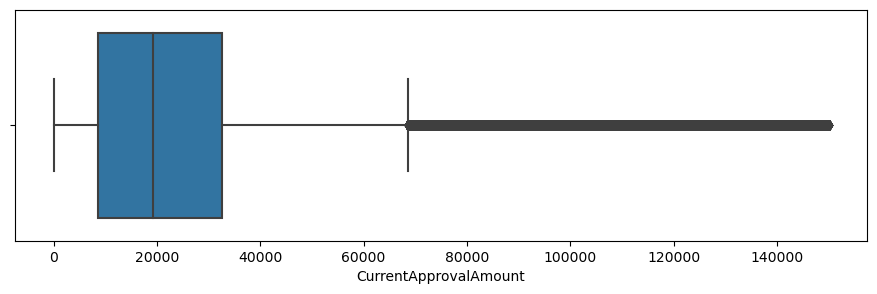

In [53]:
# outliers

plt.figure(figsize=(11,3))
sns.boxplot(data=df, x = 'CurrentApprovalAmount')

<Axes: xlabel='LoanStatus', ylabel='CurrentApprovalAmount'>

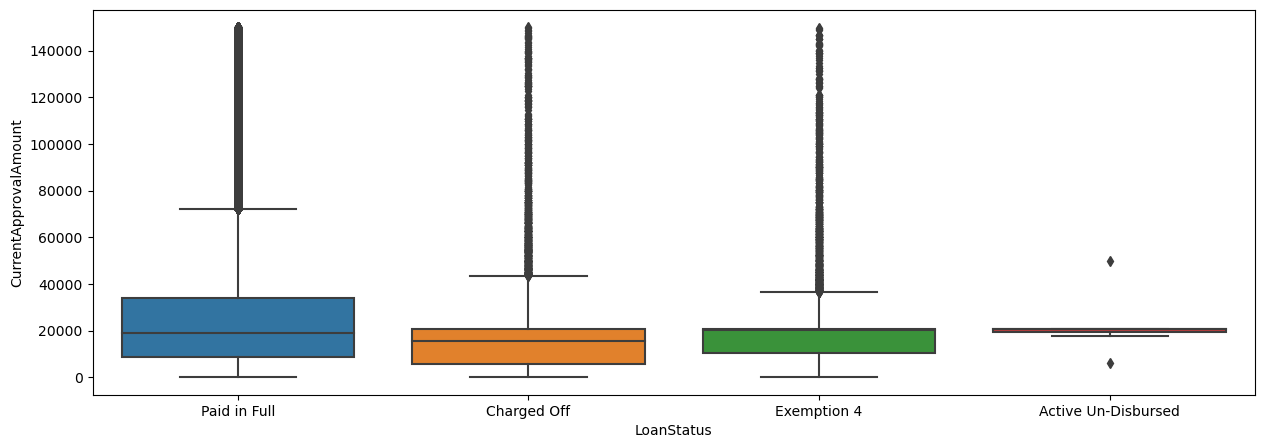

In [57]:
plt.figure(figsize=(15,5))
sns.boxplot(data = df, x= 'LoanStatus', y = 'CurrentApprovalAmount')

<Axes: xlabel='CurrentApprovalAmount', ylabel='Density'>

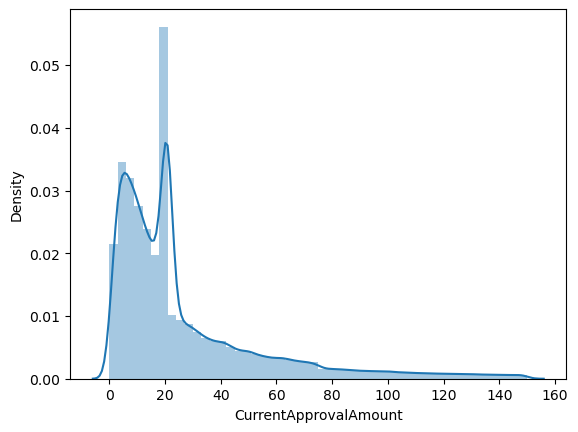

In [58]:
sns.distplot(df['CurrentApprovalAmount']/10**3)

In [59]:
df['CurrentApprovalAmount'].skew()

2.0171684814505197

In [60]:
df['CurrentApprovalAmount'].kurt()

4.11594822310745

In [61]:
matrix = df.corr()

<Axes: >

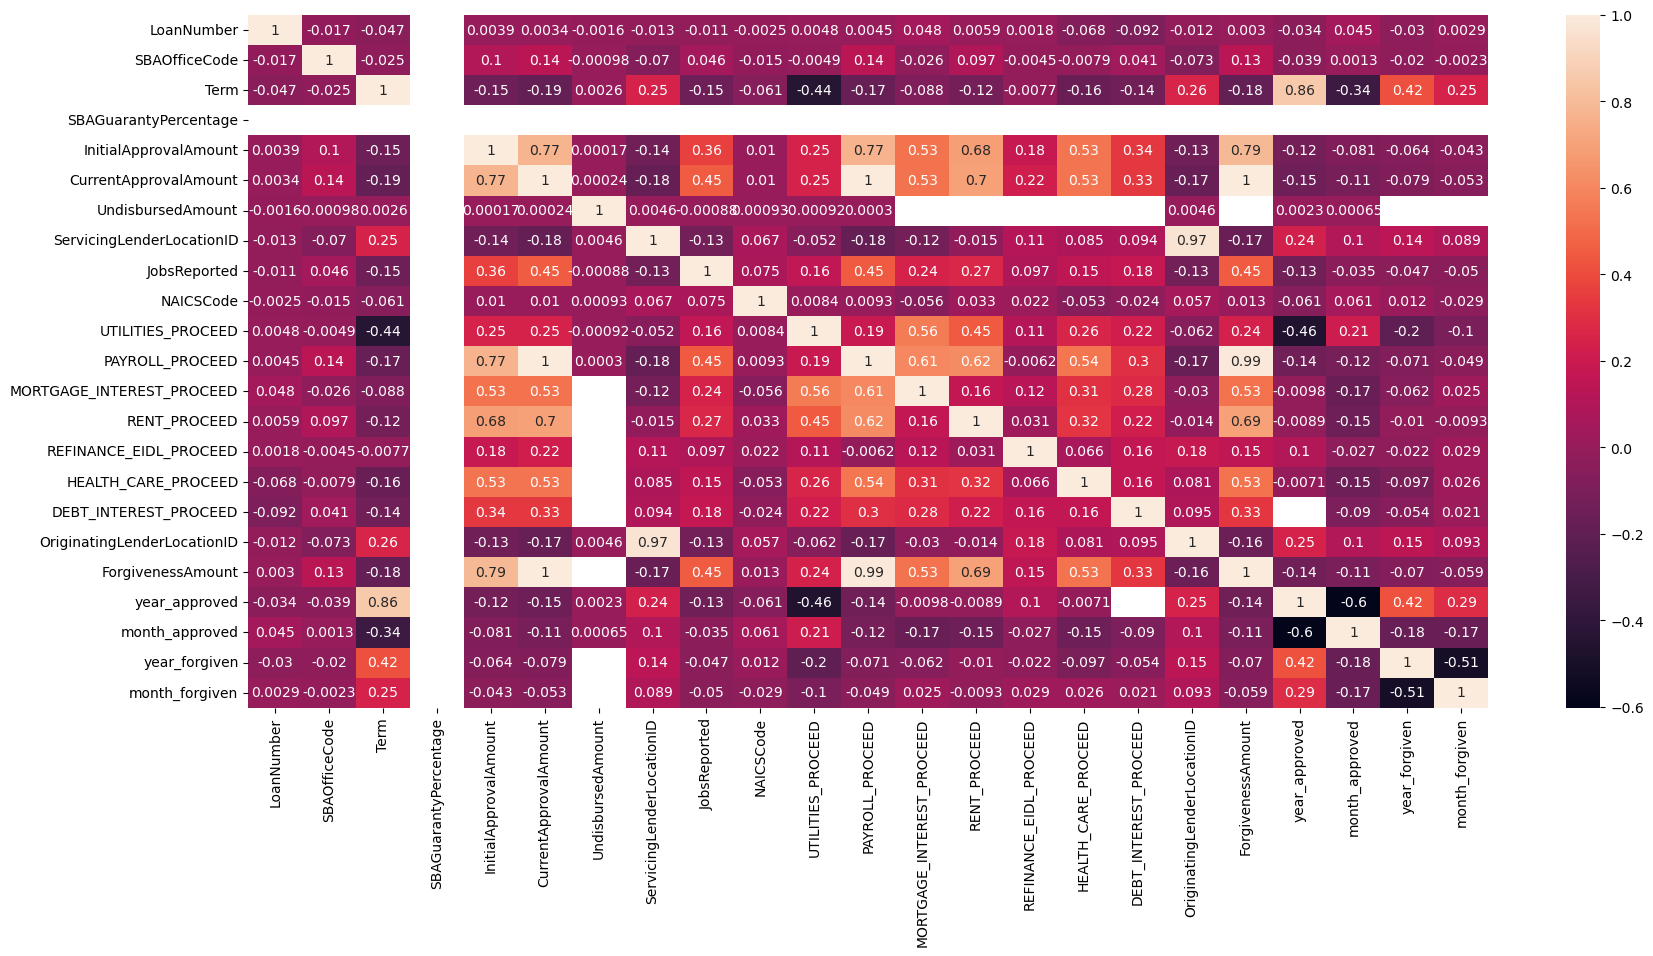

In [69]:
f, ax = plt.subplots(figsize = (20,9))
sns.heatmap(matrix, annot = True)